In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Import necessary packages, and set random seed at 42, to ensure results can be reproduced.

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# link relevant model and input data

In [3]:
NUM_CLASSES = 6

# define the number of classes according to the number of valid hand gestures

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

# Load the independent variable

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

# Load the dependent variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Split data into training and testing

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES+1, activation='softmax')
])

# Define a model structure

In [8]:
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)
# Describe the model compiled above

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Set callbacks like checkpoints and earlystopping

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# checkpoint controls how often the model weights are updated

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)
# earlystopping helps cut the training process short if loss bottoms out after a given number of epochs

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Set the optimizer and loss function for the model

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

# Fit the model to our data, with our custom callbacks

Epoch 1/1000
1/4 [======>.......................] - ETA: 3s - loss: 1.9679 - accuracy: 0.2031
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 2s 194ms/step - loss: 1.9578 - accuracy: 0.2111 - val_loss: 1.8490 - val_accuracy: 0.1933
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.9289 - accuracy: 0.1719
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 36ms/step - loss: 1.8614 - accuracy: 0.2467 - val_loss: 1.8003 - val_accuracy: 0.2467
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.8624 - accuracy: 0.2109
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 38ms/step - loss: 1.8414 - accuracy: 0.2444 - val_loss: 1.7612 - val_accuracy: 0.3467
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.7791 - accuracy: 0.3281
Epoch 4: sa

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

# Evaluate validation loss and accuracy

2/2 [==============================] - 0s 5ms/step - loss: 0.0644 - accuracy: 1.0000


In [13]:
model = tf.keras.models.load_model(model_save_path)

# Load the model into memory

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

# 

1/1 [==============================] - 0s 210ms/step
[1.26180125e-11 1.53682136e-11 1.00000000e+00 3.51516860e-08
 4.52970816e-09 2.71343364e-11 7.18603441e-11]
2


5/5 [==============================] - 0s 3ms/step


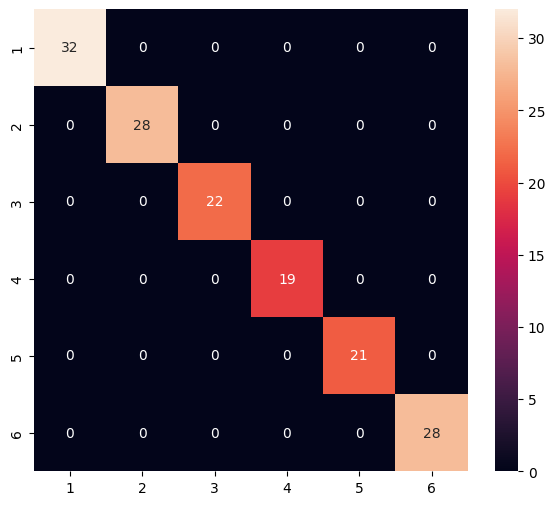

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        28

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Import metrics to judge model performance

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

# Define a function that plots a Confusion Matrix as a heatmap

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Run our model through the plotting function

# Tensorflow-Lite

In [16]:
model.save(model_save_path, include_optimizer=False)

# Save the model

In [17]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Convert Keras Model to TFLite for easier interoperability

INFO:tensorflow:Assets written to: C:\Users\amaan\AppData\Local\Temp\tmp1mzn509k\assets


6676

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.2618035e-11 1.5368243e-11 1.0000000e+00 3.5151682e-08 4.5297166e-09
 2.7134387e-11 7.1860483e-11]
2
